<img align="center" src="./images/occiput_logo3.png" width="400">

# Compressed PET projections

Occiput stores PET projection data in a compressed format. Compression reduces the RAM, GPU and disk memory requirements, enabling the reconstruction of long time series. The GPU projection and back-projection kernels operate directly on the compressed projection data; therefore compression increases the performance of the projection and back-projection algorithms avoiding the computation of projections and back-projections along irrelevant lines of response. 

The compressed projection data can be generated from list-mode data and from uncompressed projection data. While the projection, back-projection and reconstruction algorithms operate directly on the compressed data, compressed projections can be decompressed to generate flat numpy nd-arrays. These are useful for inspection and visualization. 

Compressed projection data can be composed by addition, subtraction, multiplication and division with other projection data (even in case of different sparsity patterns) and with scalar values. 

Subsets of the projection data can be extracted in two ways (these can be combined): by specifying the sparsity pattern in each projection plane; and by specifying a subset of the projection planes. The methods for the extraction of subsets of the projection data are utilized for example by the OSEM reconstruciton algorithm. 

This notebook exemplifies the creation and manipulation of compressed projeciton data. 

In [1]:
import occiput

### Generate compressed projection data from list-mode 

In [2]:
pet = occiput.Reconstruction.PET.PET_Static_Scan()
pet.set_scanner(occiput.Reconstruction.PET.PET_scanners.Biograph_mMR)

pet.use_compression(True)
time_range_ms = [0,200000]
pet.import_listmode('../../data/PET_data/scans/2014_09_05_brain_nf_014_base/listmode_and_sensitivity/PET_ACQ_506_20140905145126-0.l.hdr')

prompts = pet.prompts

In [3]:
print "Are the prompts compressed?: ",prompts.is_compressed()

Are the prompts compressed?:  True


In [4]:
# The compressed data is composed of four C arrays: data, locations, offsets, directions
print prompts.data.shape
print prompts.sparsity.locations.shape
print prompts.sparsity.offsets.shape
#print prompts.sparsity.directions

(56720650,)
(3, 56720650)
(11, 252)


### Uncompress

Uncompression done


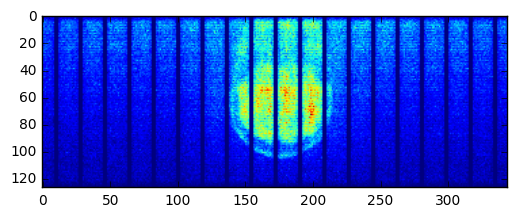

In [5]:
uncompressed_prompts = prompts.uncompress_self()
imshow(uncompressed_prompts.data[0,5,:,:].transpose())

### Compress a Numpy nd-array

In [6]:
# not yet implemented

### Composition

In [7]:
prompts2 = prompts + prompts

### Extract subsets (uncompressed)

In [8]:
subsets_generator = occiput.Reconstruction.PET.PET_subsets.SubsetGenerator(prompts.binning.N_azimuthal, prompts.binning.N_axial)
subsets = subsets_generator.new_subset(mode="random",subset_size=8)

uncompressed_prompts_subset = uncompressed_prompts.get_subset(subsets)

print uncompressed_prompts.data.shape, uncompressed_prompts_subset.data.shape
# Note: the resulting projection always has dimensions (subset_size, 1, ..,..)
# The first index runs over the projection planes in the subset. 

(252, 11, 344, 127) (8, 1, 344, 127)


### Extract subsets (compressed)

In [9]:
# Not yet implemented 
#prompts_subset = prompts.get_compressed_subset(subsets)

In [10]:
prompts.get_angles()

array([[[ 0.        ,  0.01246664,  0.02493327, ...,  3.10419273,
          3.1166594 ,  3.12912607],
        [ 0.        ,  0.01246664,  0.02493327, ...,  3.10419273,
          3.1166594 ,  3.12912607],
        [ 0.        ,  0.01246664,  0.02493327, ...,  3.10419273,
          3.1166594 ,  3.12912607],
        ..., 
        [ 0.        ,  0.01246664,  0.02493327, ...,  3.10419273,
          3.1166594 ,  3.12912607],
        [ 0.        ,  0.01246664,  0.02493327, ...,  3.10419273,
          3.1166594 ,  3.12912607],
        [ 0.        ,  0.01246664,  0.02493327, ...,  3.10419273,
          3.1166594 ,  3.12912607]],

       [[-0.48199999, -0.48199999, -0.48199999, ..., -0.48199999,
         -0.48199999, -0.48199999],
        [-0.373     , -0.373     , -0.373     , ..., -0.373     ,
         -0.373     , -0.373     ],
        [-0.259     , -0.259     , -0.259     , ..., -0.259     ,
         -0.259     , -0.259     ],
        ..., 
        [ 0.259     ,  0.259     ,  0.259     , ...,